In [2]:
install.packages('evir')

Installing package into ‘/home/peyratal/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [3]:
library(evir)
library(ggplot2)
data(danish)


Attaching package: ‘ggplot2’


The following object is masked from ‘package:evir’:

    qplot




In [4]:
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [5]:
str(danish)

 num [1:2167] 1.68 2.09 1.73 1.78 4.61 ...
 - attr(*, "times")= POSIXt[1:2167], format: "1980-01-03 01:00:00" "1980-01-04 01:00:00" ...


In [6]:
n = as.numeric(danish)

In [7]:
attributes(danish)$times[1] # renvoie la date du premier feu
danish[1] # renvoie le claim du 

[1] "1980-01-03 01:00:00 CET"

[1] 1.683748

In [8]:
head(attributes(danish)$times,10)

 [1] "1980-01-03 01:00:00 CET" "1980-01-04 01:00:00 CET"
 [3] "1980-01-05 01:00:00 CET" "1980-01-07 01:00:00 CET"
 [5] "1980-01-07 01:00:00 CET" "1980-01-10 01:00:00 CET"
 [7] "1980-01-10 01:00:00 CET" "1980-01-16 01:00:00 CET"
 [9] "1980-01-16 01:00:00 CET" "1980-01-19 01:00:00 CET"

In [9]:
t <- int_diff(attributes(danish)$times)

In [10]:
t2 <- difftime(attributes(danish)$times[1],attributes(danish)$times[2])
t2

Time difference of -1 days

In [61]:
print(as.numeric(t2))

[1] 1


In [71]:
str(attributes(danish)$times)

 POSIXt[1:2167], format: "1980-01-03 01:00:00" "1980-01-04 01:00:00" "1980-01-05 01:00:00" ...


In [5]:
vect_inter <-vector()
for(i in 0:2166){
    vect_inter[i] <- as.numeric(difftime(attributes(danish)$times[i+1],attributes(danish)$times[i]))
}
lamb = 2167/cumsum(vect_inter)[length(cumsum(vect_inter))] # On fait bien le nombre de feux sur le temps d'arrivé 
lamb

[1] 0.539726

In [7]:
ex = rexp(10000, rate = lamb) 

[1] 1 1 2 0 3 0 6 0 3 2

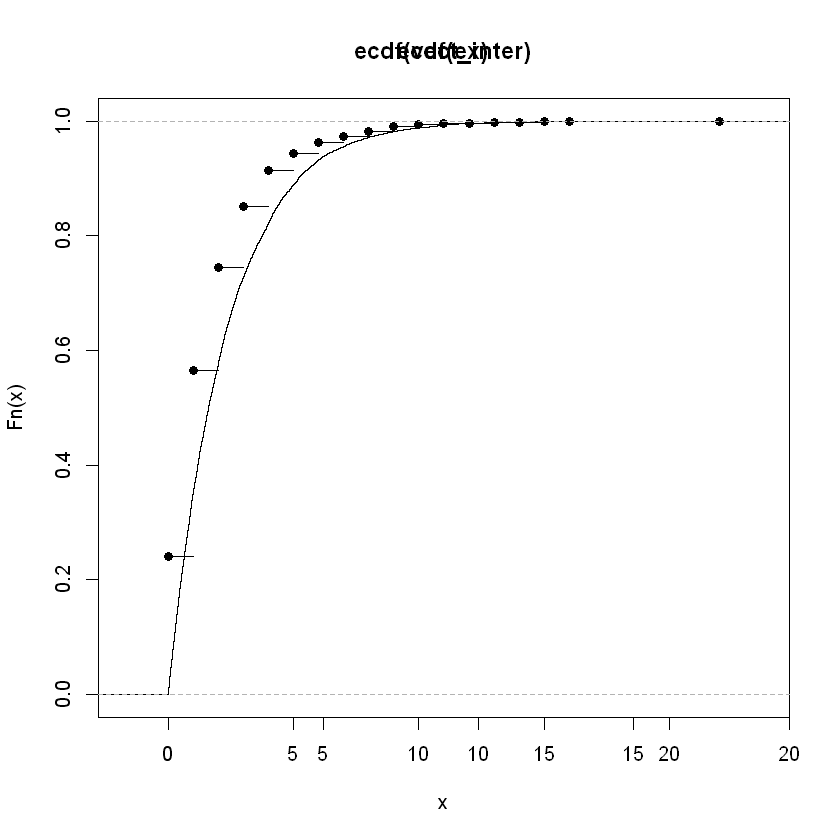

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



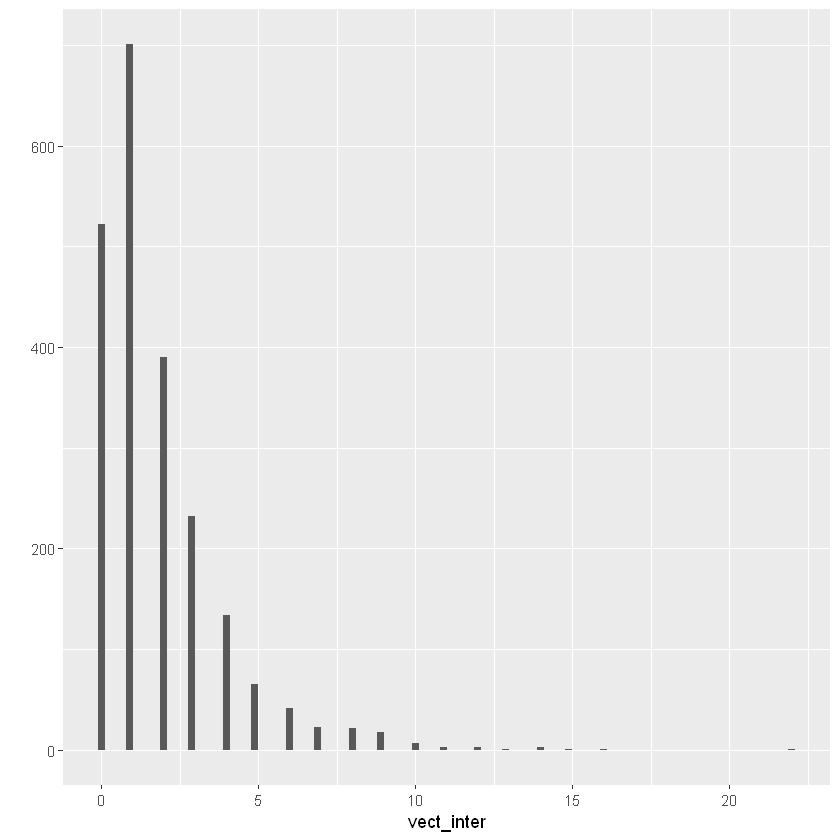

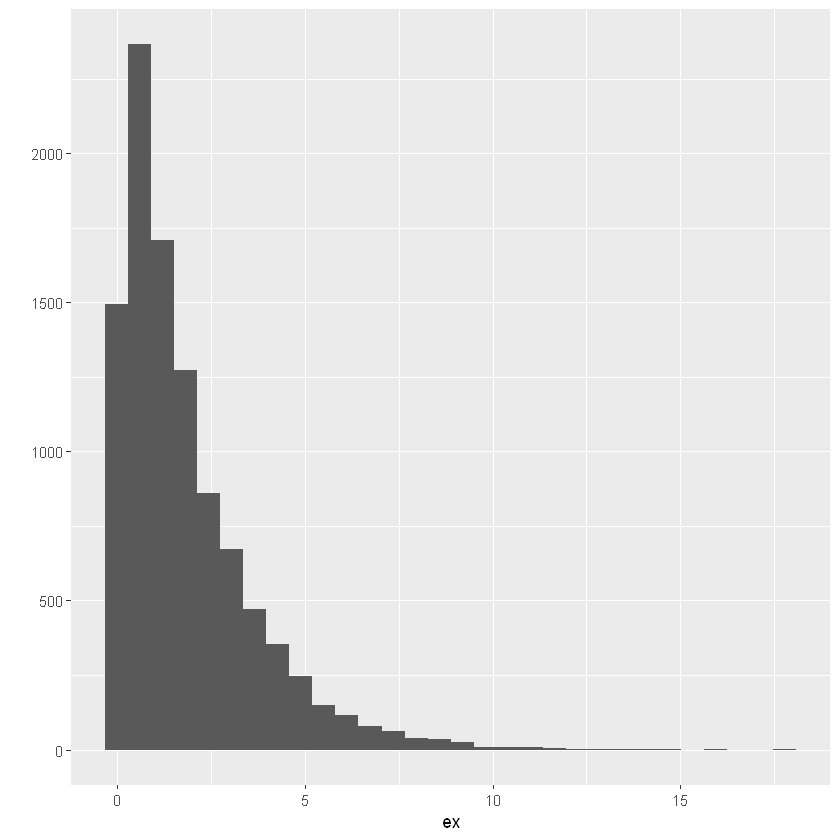

In [8]:
head(vect_inter,10)

plot(ecdf(vect_inter), ylab="Fn(x)", pch = 19)
par(new=TRUE)
plot(ecdf(ex), ylab="Fn(x)", pch = 19)
qplot(vect_inter,geom = "histogram",bins=100)
qplot(ex,geom = "histogram")

In [50]:
a<-rnorm(2166,mean=0,sd=0.000001)
head(a)
ks.test(vect_inter+a, "pexp", lamb)

[1]  1.228681e-06 -4.740768e-07 -1.948285e-07 -1.057810e-06  3.521961e-07
[6] -4.743685e-07


	One-sample Kolmogorov-Smirnov test

data:  vect_inter + a
D = 0.241, p-value < 2.2e-16
alternative hypothesis: two-sided


In [33]:
help(ecdf)

## Claim Analysis

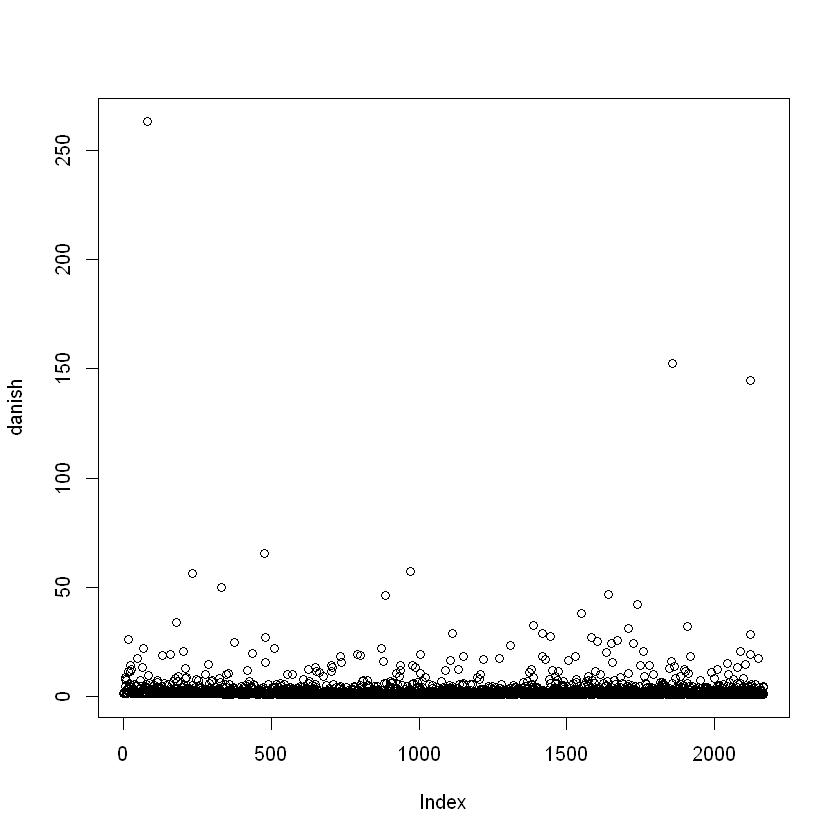

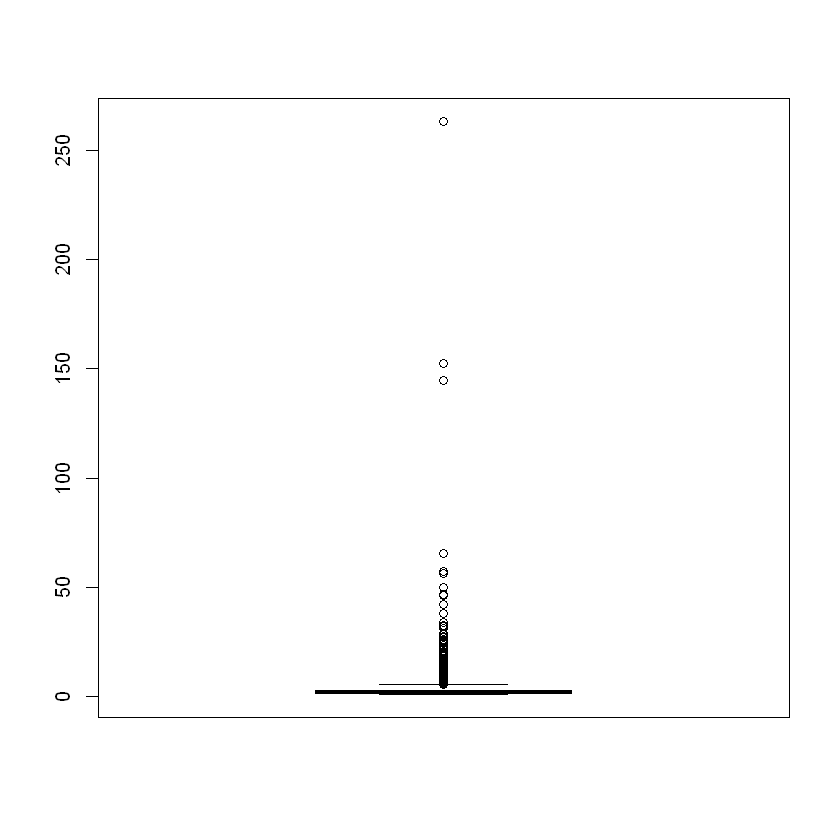

In [53]:
plot(danish)
boxplot(danish)